In [55]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora

In [56]:
import os
import pandas as pd

In [57]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type="top2vec"
model_name="Top2Vec"
embedding_model = "preliminary"
data_type="np_mini_raw"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"



folder_name = f"Preliminary-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
seed = 42
df = load_from_file(folder_path_data,file_name_data)

data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [58]:
topic_model = None

try:
    topic_model = Top2Vec.load(file_path)
except:
    topic_model = Top2Vec(documents=new_data)


In [59]:
topic_model.save(file_path)

In [60]:
print(topic_model.embedding_model)

doc2vec


In [61]:
num_topics = topic_model.get_num_topics()
print(num_topics)

2


In [62]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [63]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [64]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [65]:
topic_model.get_topics()

(array([['jeg', 'ikke', 'vært', 'noen', 'en', 'saken', 'man', 'være',
         'et', 'helt', 'de', 'dem', 'noe', 'se', 'synes', 'hva',
         'hvordan', 'gjør', 'hvis', 'gjelder', 'mener', 'arbeiderpartiet',
         'hensyn', 'ønsker', 'annen', 'kommunene', 'enig', 'hele', 'sier',
         'gjøre', 'disse', 'takker', 'samme', 'bare', 'hvilke',
         'allerede', 'kommer', 'regjeringen', 'hvor', 'na', 'mulig',
         'selv', 'flertall', 'kommet', 'norge', 'hvert', 'flere', 'tror',
         'tiden', 'apenbart'],
        ['ein', 'ikkje', 'ei', 'dei', 'berre', 'eg', 'noko', 'eit', 'no',
         'sjølv', 'sja', 'vere', 'gjer', 'nokre', 'ligg', 'heilt', 'vore',
         'kva', 'meir', 'noreg', 'mykje', 'kjem', 'kome', 'trur', 'gjere',
         'seie', 'korleis', 'desse', 'fleire', 'gjeld', 'heile', 'vidare',
         'nokon', 'tek', 'sjølvsagt', 'ho', 'veit', 'ønskjer', 'synest',
         'saman', 'meiner', 'treng', 'betre', 'fekk', 'saka', 'utan',
         'viktigaste', 'leggje', 's

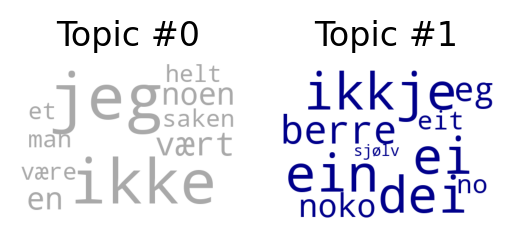

In [66]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores,num_topics,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [67]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'jeg': 0.5055622, 'ikke': 0.47383833, 'vært': 0.47284383, 'noen': 0.47182265, 'en': 0.47058627, 'saken': 0.46759608, 'man': 0.4607791, 'være': 0.44542253, 'et': 0.4429487, 'helt': 0.44016778, 'de': 0.43629208, 'dem': 0.42410743, 'noe': 0.41779143, 'se': 0.41402292, 'synes': 0.41056693, 'hva': 0.40921482, 'hvordan': 0.40000796, 'gjør': 0.39713666, 'hvis': 0.3964179, 'gjelder': 0.39594305, 'mener': 0.39533257, 'arbeiderpartiet': 0.39347437, 'hensyn': 0.393424, 'ønsker': 0.38935506, 'annen': 0.38719937, 'kommunene': 0.38680965, 'enig': 0.38475415, 'hele': 0.38469633, 'sier': 0.38375375, 'gjøre': 0.38298044, 'disse': 0.37924254, 'takker': 0.37847546, 'samme': 0.37836826, 'bare': 0.3779663, 'hvilke': 0.37609857, 'allerede': 0.37534347, 'kommer': 0.3753229, 'regjeringen': 0.373604, 'hvor': 0.37351575, 'na': 0.3701946, 'mulig': 0.36974323, 'selv': 0.36949766, 'flertall': 0.36885318, 'kommet': 0.36724058, 'norge': 0.36262363, 'hvert': 0.36236522, 'flere': 0.36131215, 'tror': 0.36048615, '

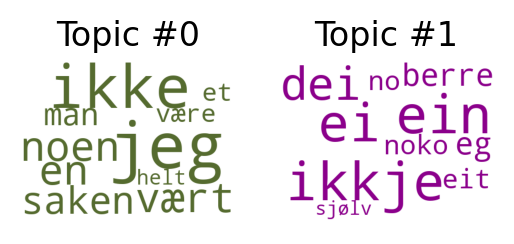

In [68]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [69]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [70]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

folder_path_topics = r"preprocessed_data/results"

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [71]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [72]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [73]:
len(loaded_topics.values())

2

In [74]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [75]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [76]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('ikke', 'jeg') wordtuple
('ikke', 'jeg') wordup
61195.0 over
116831764.0 under
-10.898731163447577 -15.901126160410374 0.6854062444069247 ('ikke', 'jeg') 61195 10966 10654
('jeg', 'vært') wordtuple
('jeg', 'vært') wordup
12354.0 over
23204056.0 under
-10.875183055057414 -13.59269061535341 0.8000758174230437 ('jeg', 'vært') 12354 10966 2116
('jeg', 'noen') wordtuple
('jeg', 'noen') wordup
11754.0 over
20616080.0 under
-10.776402521873056 -13.520864182988744 0.7970202478205033 ('jeg', 'noen') 11754 10966 1880
('en', 'jeg') wordtuple
('en', 'jeg') wordup
83276.0 over
163777210.0 under
-10.941546222682277 -16.345613152812675 0.6693873224816598 ('en', 'jeg') 83276 10966 14935
('jeg', 'saken') wordtuple
('jeg', 'saken') wordup
3822.0 over
7807792.0 under
-10.99637112628574 -11.900112062977456 0.9240560986393269 ('jeg', 'saken') 3822 10966 712
('jeg', 'man') wordtuple
('jeg', 'man') wordup
39129.0 over
71706674.0 under
-10.839653446209308 -15.255950620034112 0.7105196992427779 ('jeg', 'ma

In [77]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

det var spesielt det representanten harald tom nesvik sa, som gjorde at jeg bad om ordet. det er også naturlig å kommentere noe av det sonja sjøli sa. jeg synes at de betraktningene som begge representantene kom med, er veldig unyanserte. man framstiller det som om regjeringen og de tre regjeringspartiene generelt er motstandere av alt som har med private tjenester å gjøre, mens opposisjonen, og da spesielt høyre og fremskrittspartiet, er veldig for det. det er et bilde som stemmer dårlig med virkeligheten. da man innførte fastlegeordningen, ble den på mange måter drevet gjennom av arbeiderpartiet og sv. i utgangspunktet hadde man kommuneleger som var fast ansatt i mange kommuner. så ble de privatpraktiserende, selvstendig næringsdrivende og fikk arbeidsgiveransvar. hvis man ser på avtaler som er inngått med privatpraktiserende spesialister, ser man at det ikke var høyre og fremskrittspartiet som drev gjennom at man burde utnytte den kapasiteten – det var i all hovedsak sv og arbeiderp

In [78]:
diversity

1.0

In [79]:
coherence

0.09240950578521848

In [80]:
from tabulate import tabulate
import csv

In [81]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════╤═══════════╤═══════════╕
│ Model                           │ Metric    │     Value │
╞═════════════════════════════════╪═══════════╪═══════════╡
│ top2vec_preliminary_np_mini_raw │ coherence │ 0.0924095 │
├─────────────────────────────────┼───────────┼───────────┤
│ top2vec_preliminary_np_mini_raw │ diversity │ 1         │
╘═════════════════════════════════╧═══════════╧═══════════╛


In [82]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})